# 3-3 Sentiments

There are a number of ways to "measure" sentiment. The one we are using here is drawn from [TextBlob](https://textblob.readthedocs.io/en/dev/) which also functionality comparable to NLTK and is worth your while. Here's just the list of things it does that's on their main page: Noun phrase extraction, Part-of-speech tagging, Sentiment analysis, Classification (Naive Bayes, Decision Tree), Tokenization (splitting text into words and sentences), Word and phrase frequencies, Parsing, n-grams, Word inflection (pluralization and singularization) and lemmatization, Spelling correction, WordNet integration.

As always, you should always "read the docs" for yourself. Learning to read documentation is just as important as, and is one step towards getting better at, writing documentation. If nothing else, encountering documentation that isn't clear or is not "newbie-friendly" should spur you to write better, friendlier documentation.

For the fun of it, this notebook uses as much of the TextBlob functionality as possible.

In [1]:
# IMPORTS
from textblob import TextBlob

# MPL
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300
plt.rcParams["figure.figsize"] = (10,5)

In [2]:
# DATA
# This notebook uses two very different data sets: 
# "The Most Dangerous Game" and the gab chats. Yow!

# MDG
with open("../data/mdg.txt", mode="r", encoding="utf-8") as f:
            mdg = f.read()

# Gab chats
with open("../queue/gabs.txt", "r") as f:
    gabs = f.readlines()

## Understanding how TextBlob "Does" Sentiment

We load some toy data to test the sentiment functionality and to see how the data is structured. We have two sentences here: one seemingly objective and one with an opinion.

In [3]:
# TOY DATA

py_obj = TextBlob("Python is a high-level, general-purpose programming language.")
py_sub = TextBlob("Python is the best programming language.")

print(f"Sentiment values for py_obj is {py_obj.sentiment}.")
print(f"Sentiment values for py_sub is {py_sub.sentiment}.")
print(f"The two polarities are {py_obj.sentiment.polarity} and {py_sub.sentiment.polarity}.")
print(f"The two subjectivities are {py_obj.sentiment.subjectivity} and {py_sub.sentiment.subjectivity}.")

Sentiment values for py_obj is Sentiment(polarity=0.0, subjectivity=0.0).
Sentiment values for py_sub is Sentiment(polarity=1.0, subjectivity=0.3).
The two polarities are 0.0 and 1.0.
The two subjectivities are 0.0 and 0.3.


## Working with a Single, Longer Text

Before you work through this first section of the notebook, watch this video excerpt of a lecture by Kurt Vonnegut on ["The Shape of Stories."](https://www.youtube.com/watch?v=j9Qsiu8qqvA) (First, Vonnegut is funny, and, second, what happens next here will make more sense.)

In [4]:
# Let's start with the short story
mdg_ = TextBlob(mdg)

for sentence in mdg_.sentences[0:3]:
    print(sentence)

"Off there to the right -- somewhere -- is a large island," said Whitney.
"It's rather a mystery -- "
"What island is it?"
Rainsford asked.


In [5]:
for sentence in mdg_.sentences[0:3]:
    print(sentence.sentiment)

Sentiment(polarity=0.25, subjectivity=0.4821428571428571)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)


Now that we have both polarities and subjectivities for all 701 sentences in "The Most Dangerous Game," we can graph them:

In [6]:
# Getting numbers for the sentences
sentence_count = [float(i) for i in range(0, len(mdg_.sentences))]

# Getting polarity & then subjectivity ratings for each sentence
mdg_polarities = [sentence.sentiment.polarity for sentence in mdg_.sentences]
mdg_subjectivities = [sentence.sentiment.subjectivity for sentence in mdg_.sentences]

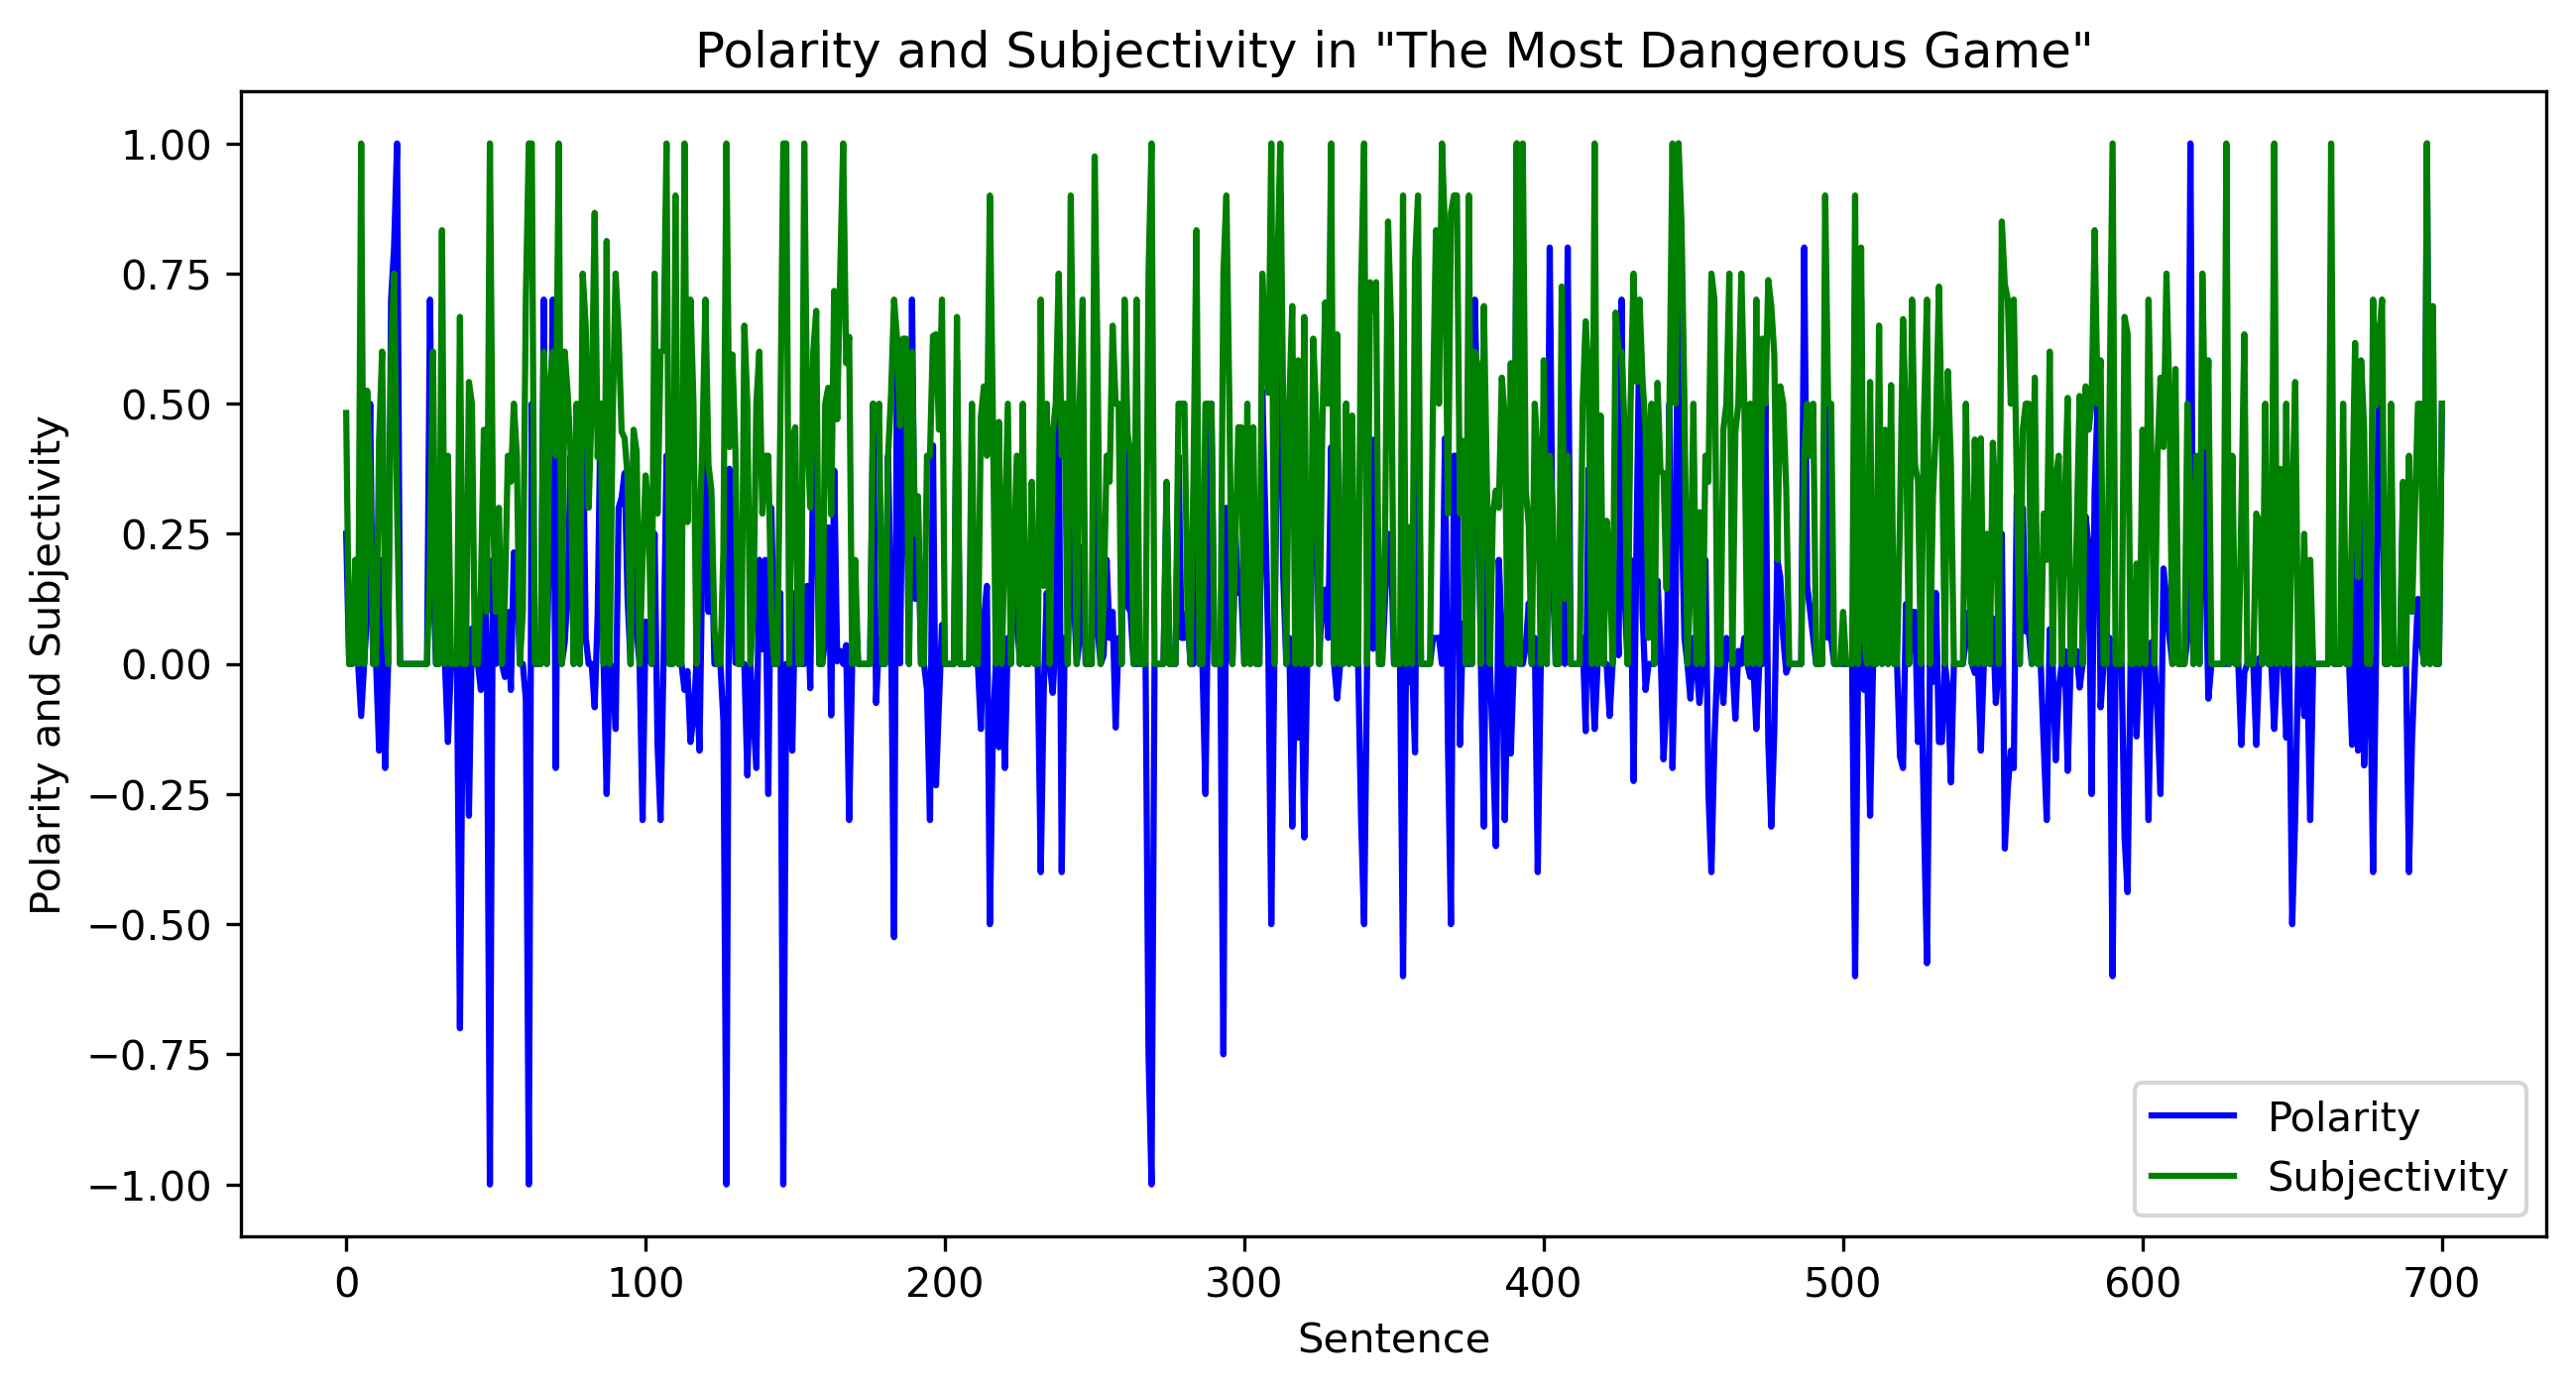

In [7]:
# Make a plot with the lines

# Our two lines
plt.plot(sentence_count, mdg_polarities, 'b', label="Polarity") 
plt.plot(sentence_count, mdg_subjectivities, 'g', label="Subjectivity") 

# Plot niceties
plt.xlabel("Sentence")
plt.ylabel("Polarity and Subjectivity")
plt.title('Polarity and Subjectivity in "The Most Dangerous Game"')
plt.grid(False)
plt.legend()

# Display
plt.show()

That is very difficult to see. There are a variety of ways to "smooth" this, including averaging by a window, but that tends to shrink the overall length of the plot -- that's an English professor joke. Let's try something mathematical. (I often use **NumPy**'s polynomial fit function here, but I thought I would **SciPy**'s interpolate just for the sake of variety.)

<div class="alert alert-block alert-warning">
<b>Note:</b> There really are a lot of ways to smooth a "spiky" plot. A lot of disciplines need it, so if you search for methods, you are going to find everything from financial analysts looking to smooth stock prices in order to discern trends to biologists looking to smooth population counts. Try as many as you like until you find something that works for you. <em>Even try writing your own code!</em></div>

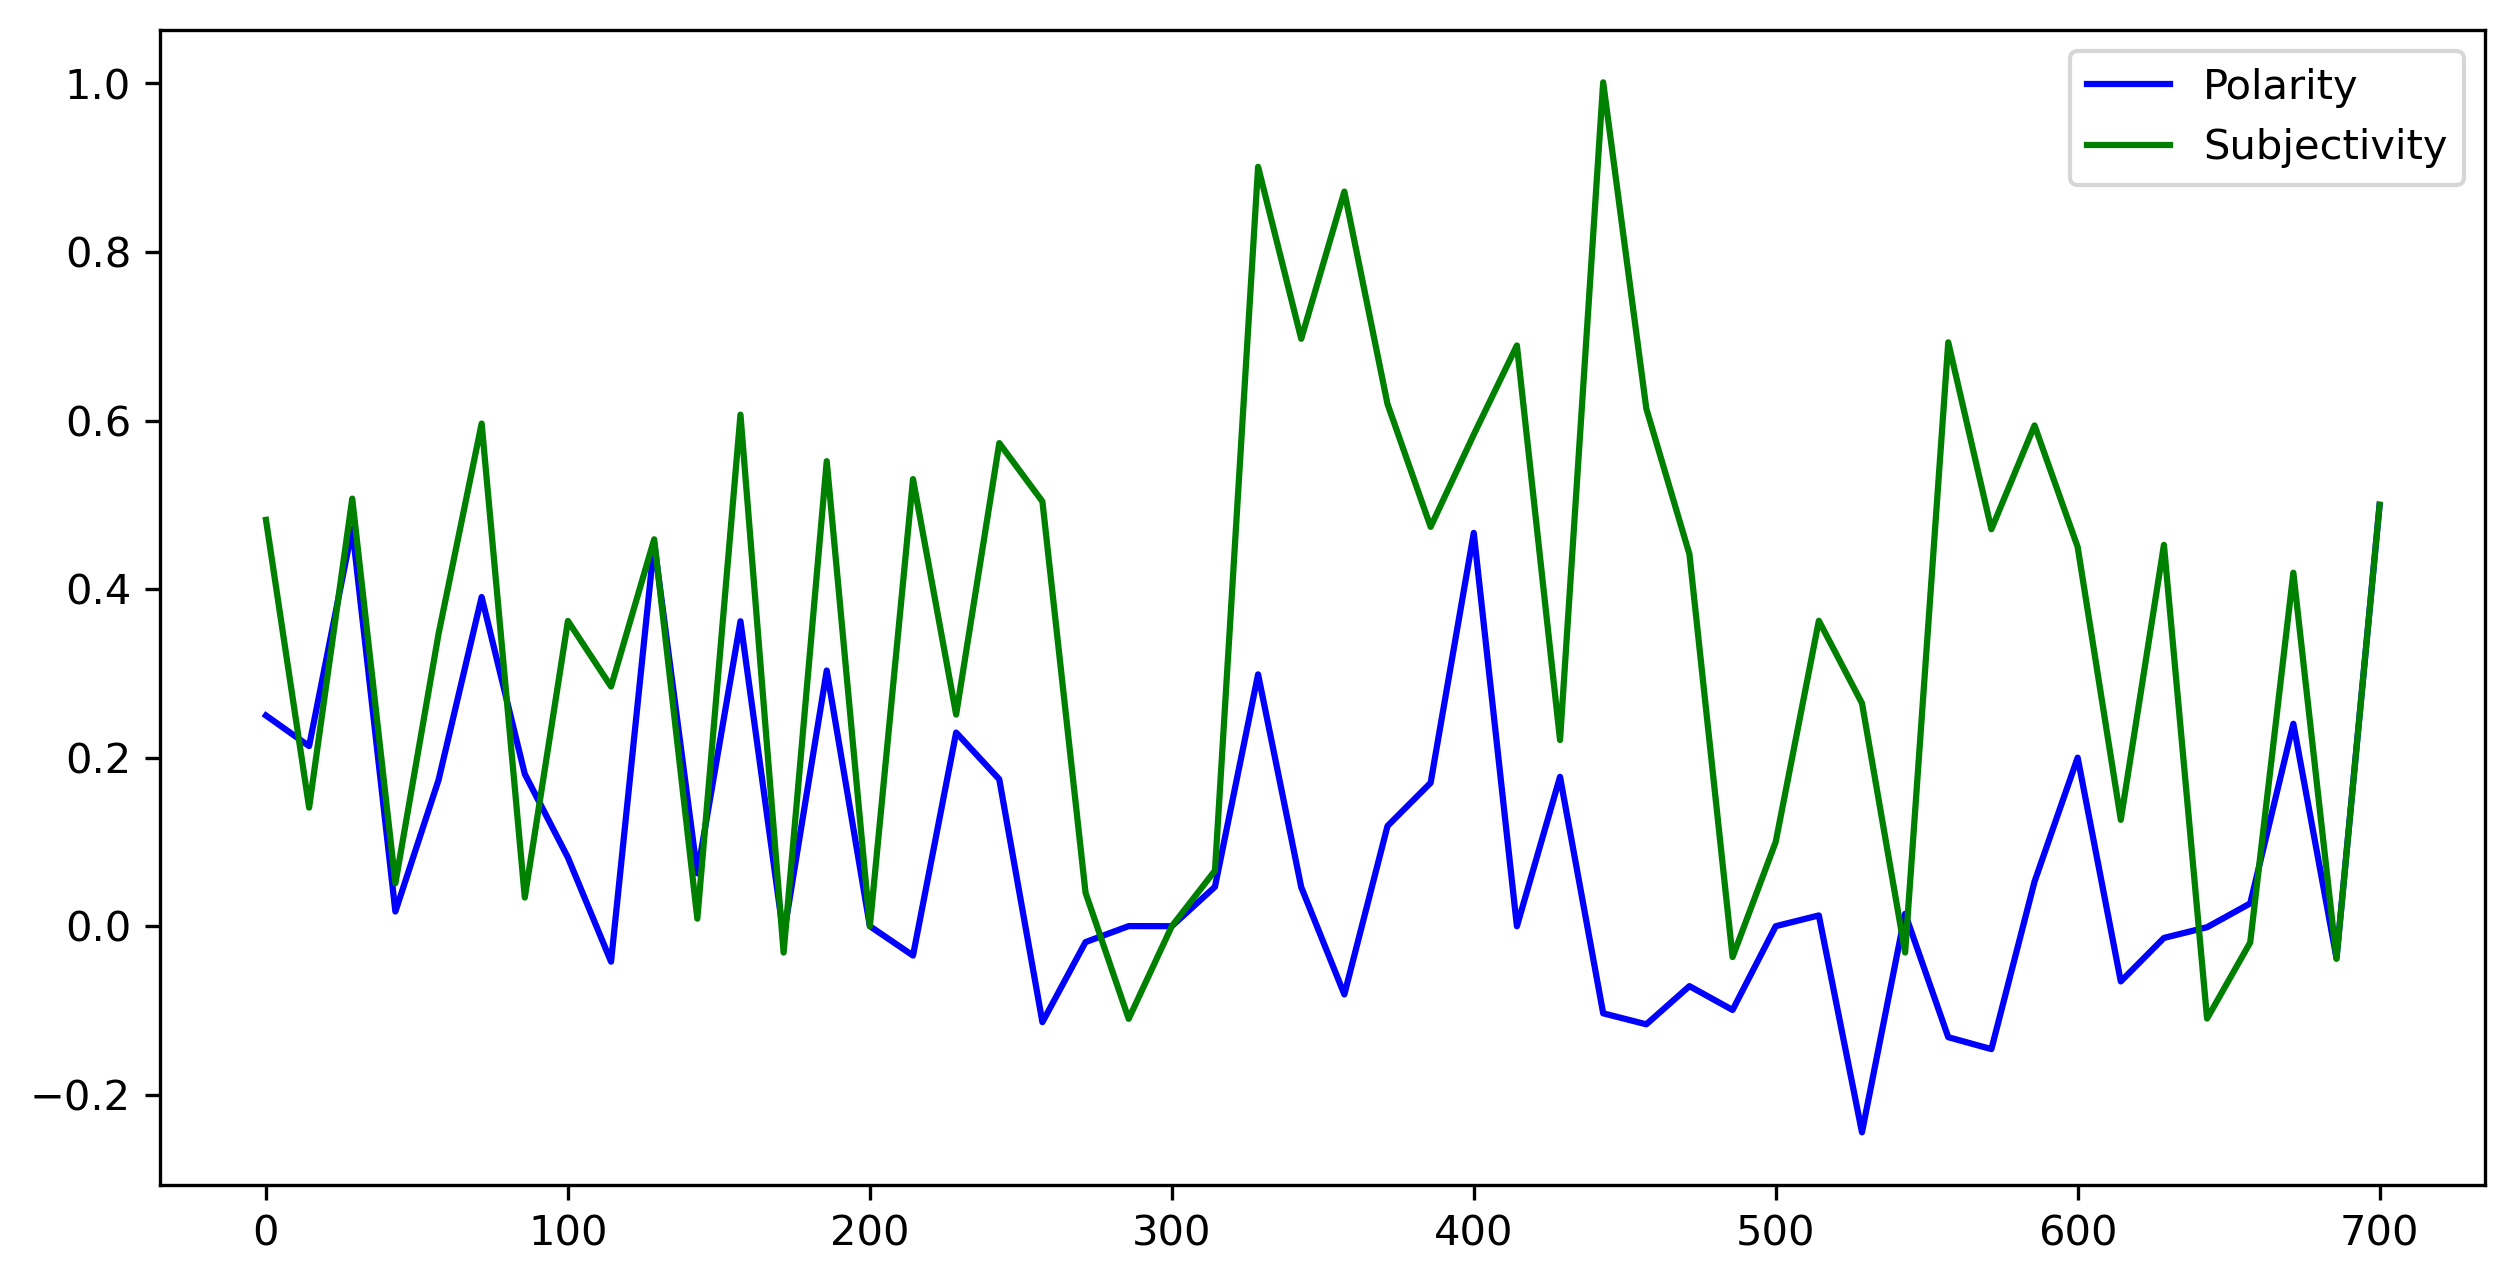

In [8]:
import numpy as np
from scipy.interpolate import interp1d

# Using SciPy's to smooth our plots
xnew = np.linspace(0, (len(sentence_count)-1)) # It didn't like the count, so I subtracted 1.
f_cubic_polar = interp1d(sentence_count, mdg_polarities, kind='cubic')
f_cubic_subject = interp1d(sentence_count, mdg_subjectivities, kind='cubic')

# Plot
# plt.scatter(sentence_count, mdg_polarities, 'b', ) 
# plt.scatter(sentence_count, mdg_subjectivities, 'g', ) 
plt.plot(xnew, f_cubic_polar(xnew), 'b', label="Polarity")
plt.plot(xnew, f_cubic_subject(xnew), 'g', label="Subjectivity")
plt.legend(loc='best')
plt.show()

That's kind of interesting: there seems to be a lot of congruence between polarity and subjectivity until almost halfway through the story: that suggests I should go back and read to see what happens there. And then we get congruence again towards the very end. 

## Gab Sentiments

In [9]:
blobs = [ TextBlob(gab) for gab in gabs ]

Before we proceed, let's do a quick visual inspection of some of the gabs: we discover quite quickly that they vary quite a bit in size.

In [10]:
# We can pick three random numbers
from random import randint
numbers = [randint(0, len(blobs)) for n in range(3)]

# Or w can look at three cases which make it clear the disparity in size
# IF YOU UNCOMMENT BELOW, COMMENT OUT ABOVE.
# numbers = [100, 200, 300]

for i in numbers:
    print(blobs[i].sentiment)
    print(blobs[i])

Sentiment(polarity=0.0, subjectivity=0.0)
 <a href="https://www.youtube.com/watch?v=DmlWzS9RaOs&amp;amp;list=RDHLafv_n_Gn4&amp;amp;index=2" rel="nofollow noopener noreferrer" target="_blank"><span class="invisible">https://www.</span>youtube.com/watch?v=DmlWzS9RaOs&amp;amp;list=RDHL<span class="invisible">afv_n_Gn4&amp;amp;index=2</span><span class="ellipsis"></span></a>  

Sentiment(polarity=0.0, subjectivity=0.0)
 How else is an usher supposed to approach the pastor? I will have to do some research on this.  

Sentiment(polarity=0.0, subjectivity=0.0)
 There blaming what ANTIFA did to the capital on us HELP  



In [11]:
# We can now get three dimensions for every gab:

# This can be any number up to 70k
gab = 100

# It's length (in words) -- we could go with characters with len(blob)
print(f"This gab is {len(blobs[gab].words)} words.")

# It's polarity
print(f"It has a polarity of {blobs[gab].sentiment.polarity}")

# And its subjectivity
print(f"and a subjectivity of {blobs[gab].sentiment.subjectivity}")

This gab is 334 words.
It has a polarity of 0.14094444444444446
and a subjectivity of 0.5003333333333333


We run calculations in separate cell because, inevitably, the graph will need some tweaking and thre's no reason to run the underlying calculations over and over.

In [12]:
# Word counts for all the gabs
x = [ len(blob) for blob in blobs ]

# Polarities
y = [ blob.sentiment.polarity for blob in blobs ]

# Subjectivity
z = [ blob.sentiment.subjectivity for blob in blobs ]

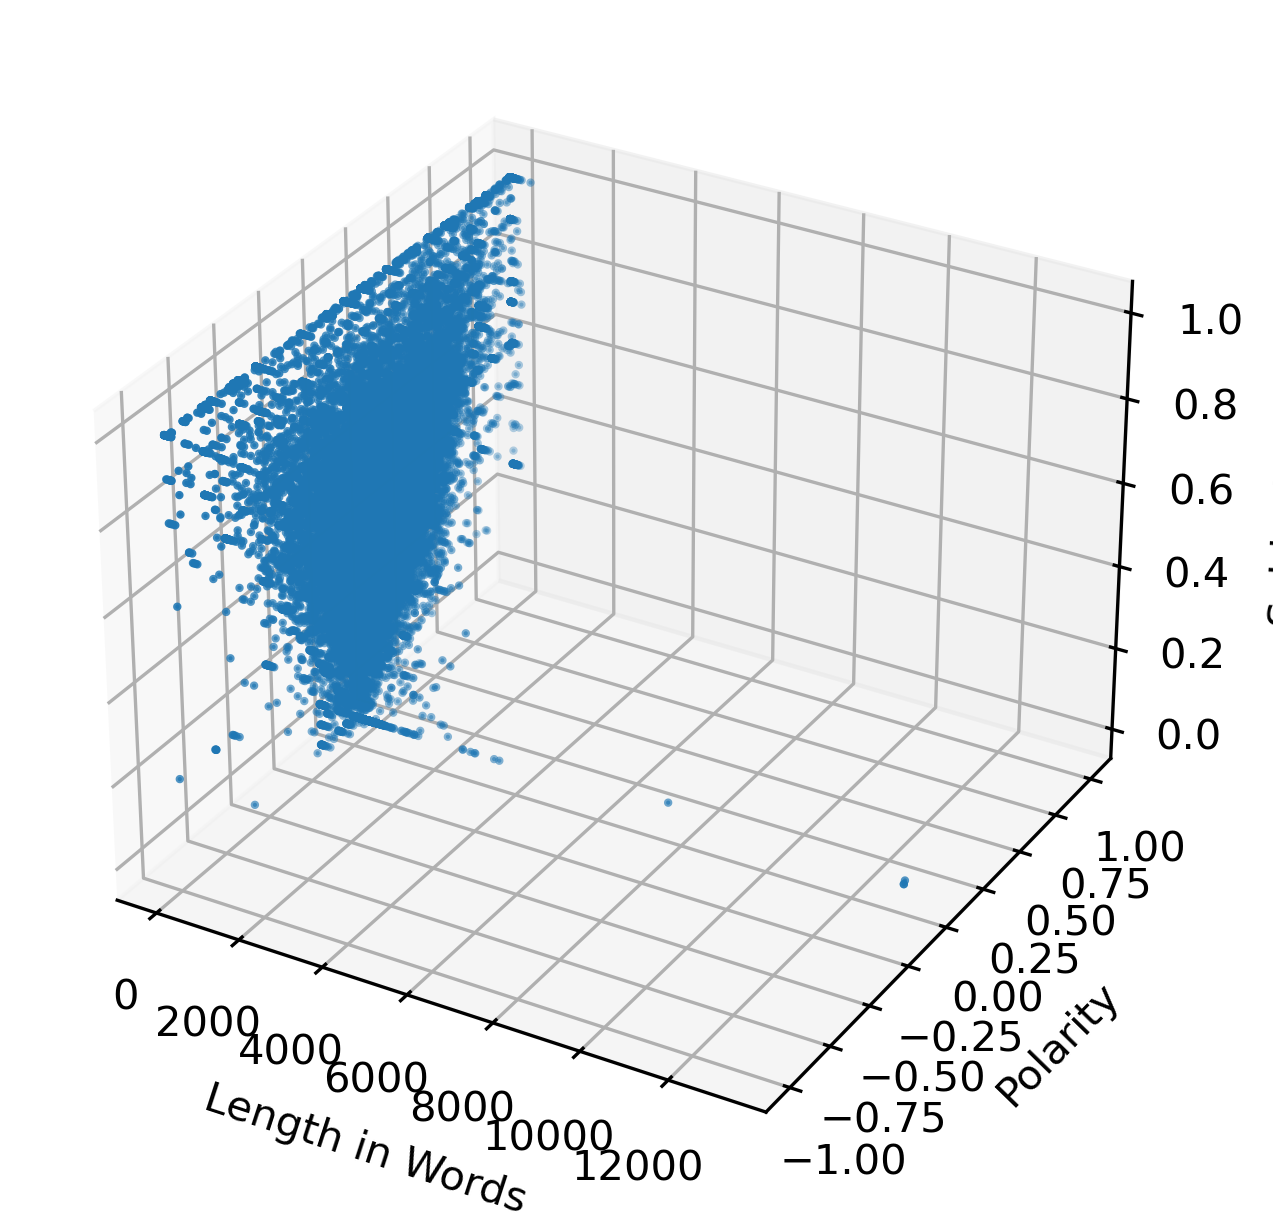

In [13]:
# Plot
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.scatter(x, y, z, s=1)

ax.set_xlabel('Length in Words')
ax.set_ylabel('Polarity')
ax.set_zlabel('Subjectivity')

plt.show()

It looks like a couple of very long texts are packing the graph to the far left. If we drop anything longer than 3000 words, to see what happens.

To do that, we need either to identify the long texts in `x`, possibly using `enumerate()`, and then remove those items in `y` and `z`, or we could zip all three lists together and then use a list comprehension to remove the triplets containing the high word counts.

In [14]:
# Zip the lists together and convert the result into a list
xyz = list(zip(x, y, z))
print(xyz[0:3])

[(1, 0.0, 0.0), (6, 0.0, 0.0), (15, 0.0, 0.0)]


In [15]:
# List comprehension to filter only texts smaller than 2000 words
xyz_ = [ (x, y, z) for x, y, z in xyz if x < 2001 ]

In [16]:
# Now we unzip back to individual lists
# So we can re-use the code above

x_, y_, z_ = zip(*xyz_)

Note that I have inverted the x_ and z_ axes in hopes of getting a better visualization. (That meant changing the labels, too.)

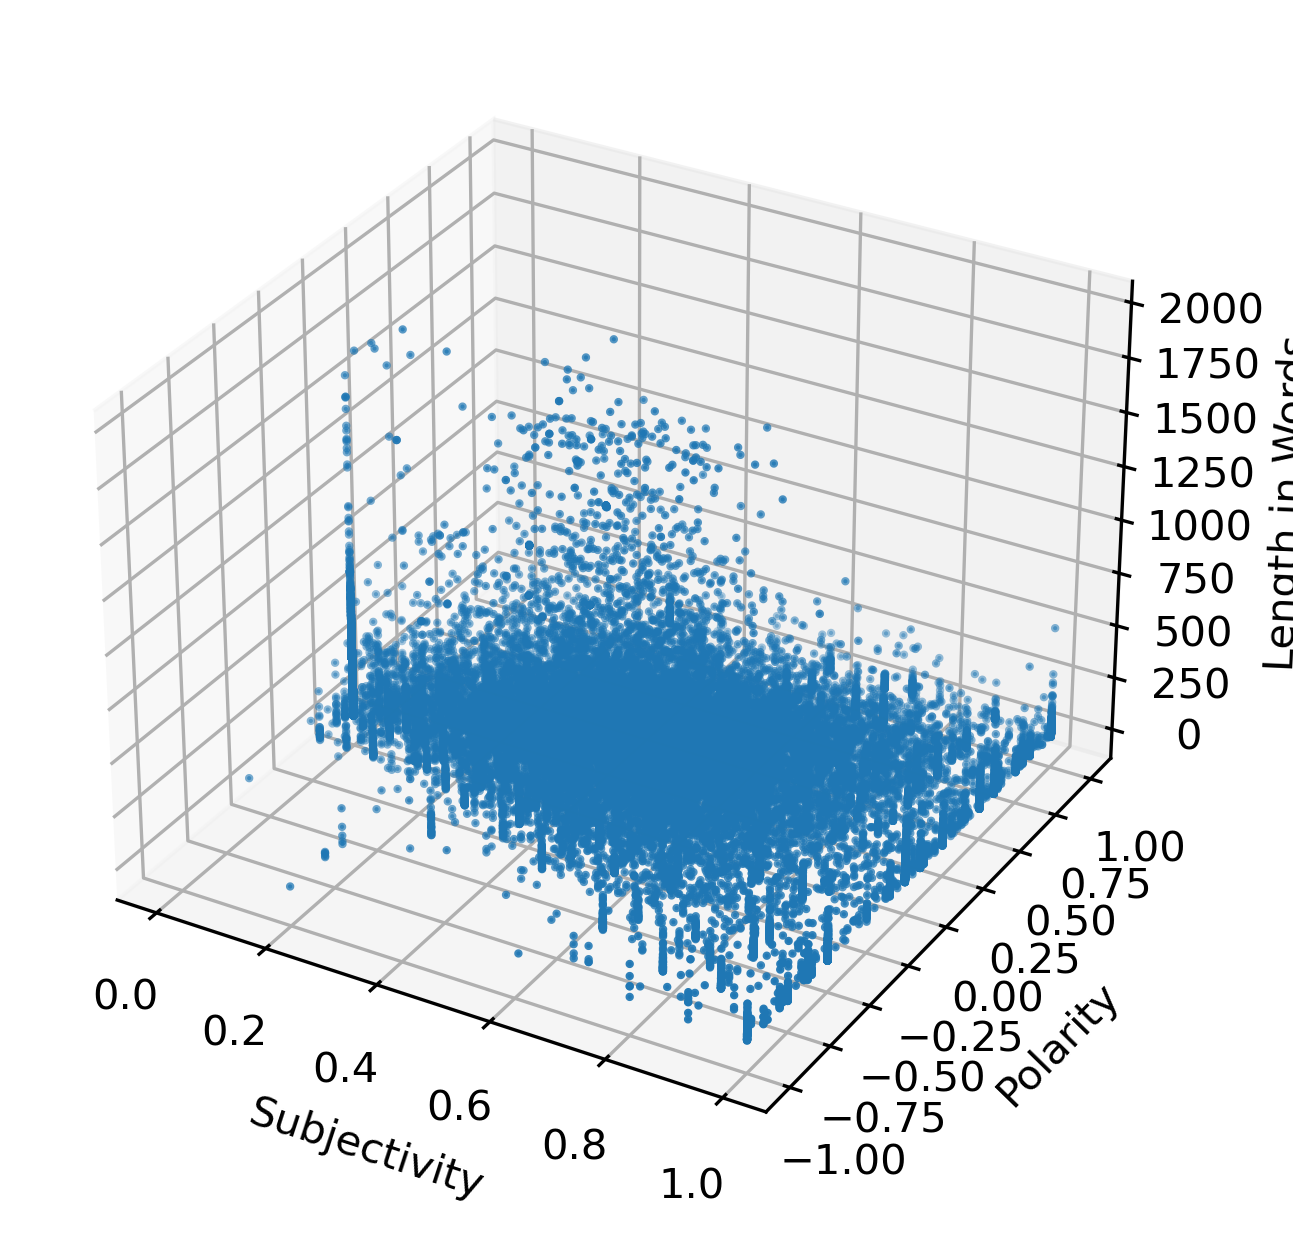

In [17]:
# Plot
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(z_, y_, x_, s=1, depthshade = True)

ax.set_xlabel('Subjectivity')
ax.set_ylabel('Polarity')
ax.set_zlabel('Length in Words')

plt.show()

With all the word counts now on the "floor" of the graph, I think it would be interesting to revisit our word counts and lift the base numerical value to see if that helps us see more of what's happening in the "golden middle." This time, everything is going into a single cell.

<div class="alert alert-block alert-success">
<b>Up to you:</b> I have distinguished between the original <code>x, y, z</code> and the two 
    modified lists, <code>x_</code> and <code>x_100</code>, but there is nothing wrong with over-writing the previous objects. (It might even be advisable in terms of not taking up too much memory.)
</div>

In [18]:
# List comprehension to filter texts by word count
xyz_min = [ (x, y, z) for x, y, z in xyz if 250 < x < 2001 ]
len(xyz_min)

7192

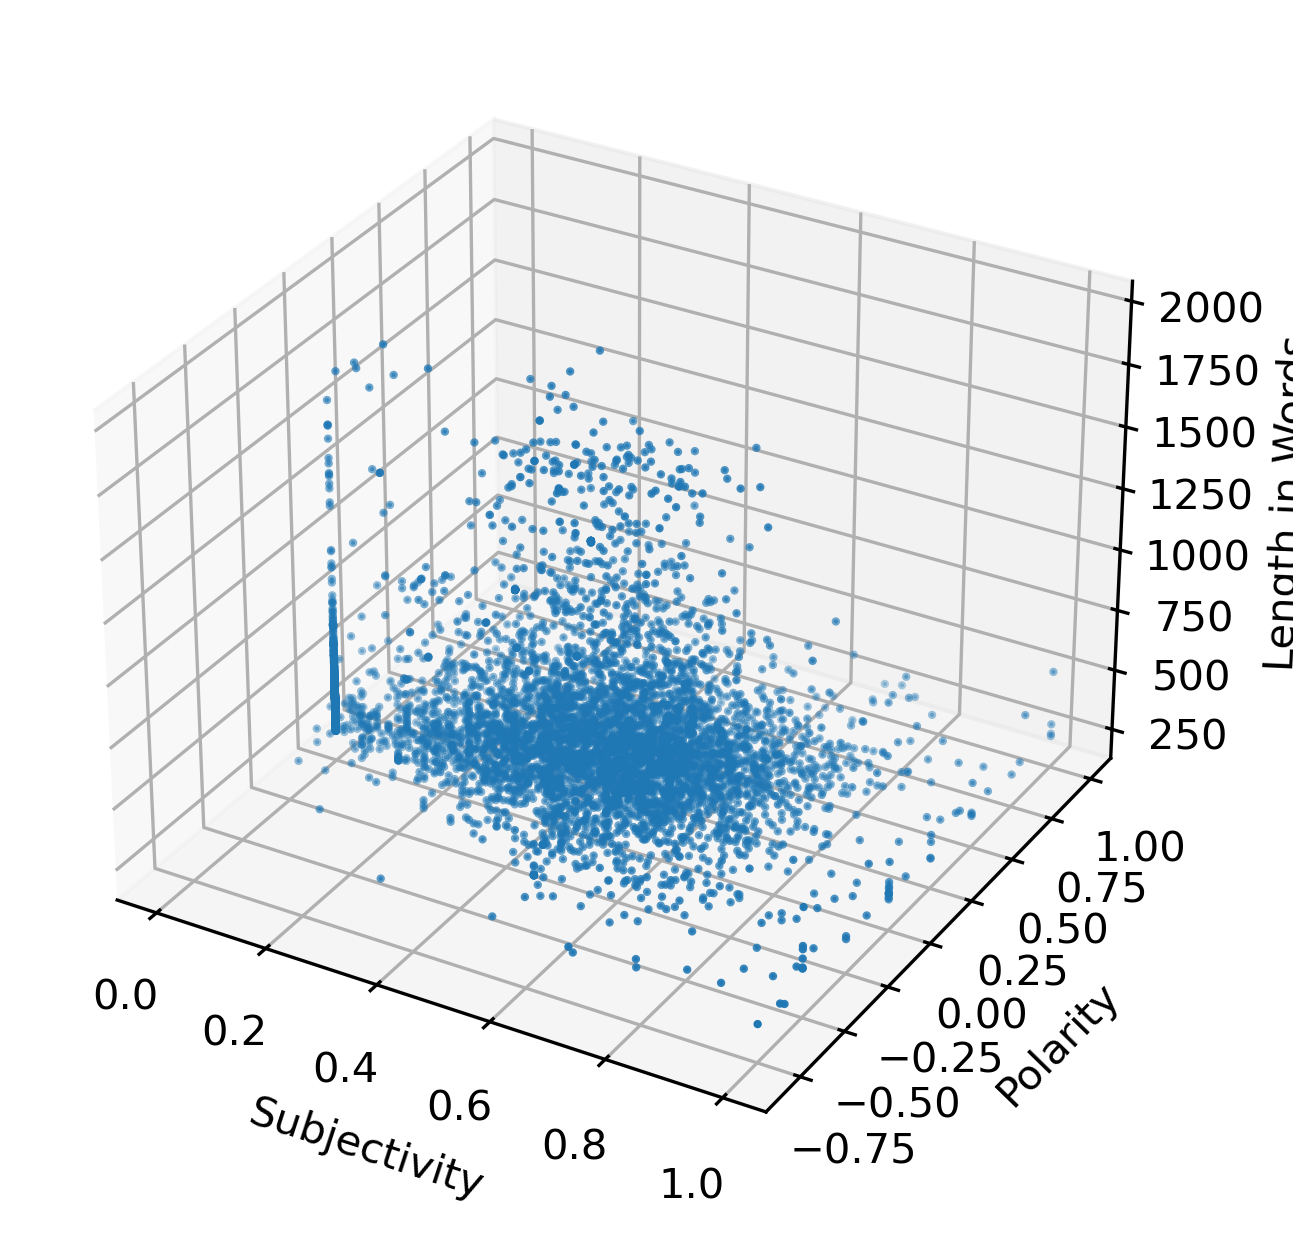

In [19]:
# Now we unzip back to individual lists
x_min, y_min, z_min = zip(*xyz_min)

# Plot
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(z_min, y_min, x_min, s=1, depthshade = True)

ax.set_xlabel('Subjectivity')
ax.set_ylabel('Polarity')
ax.set_zlabel('Length in Words')

plt.show()

It's very tempting to work and re-work a three-dimensional graph, but sometimes the easier course of action is to break the data up into two subplots.

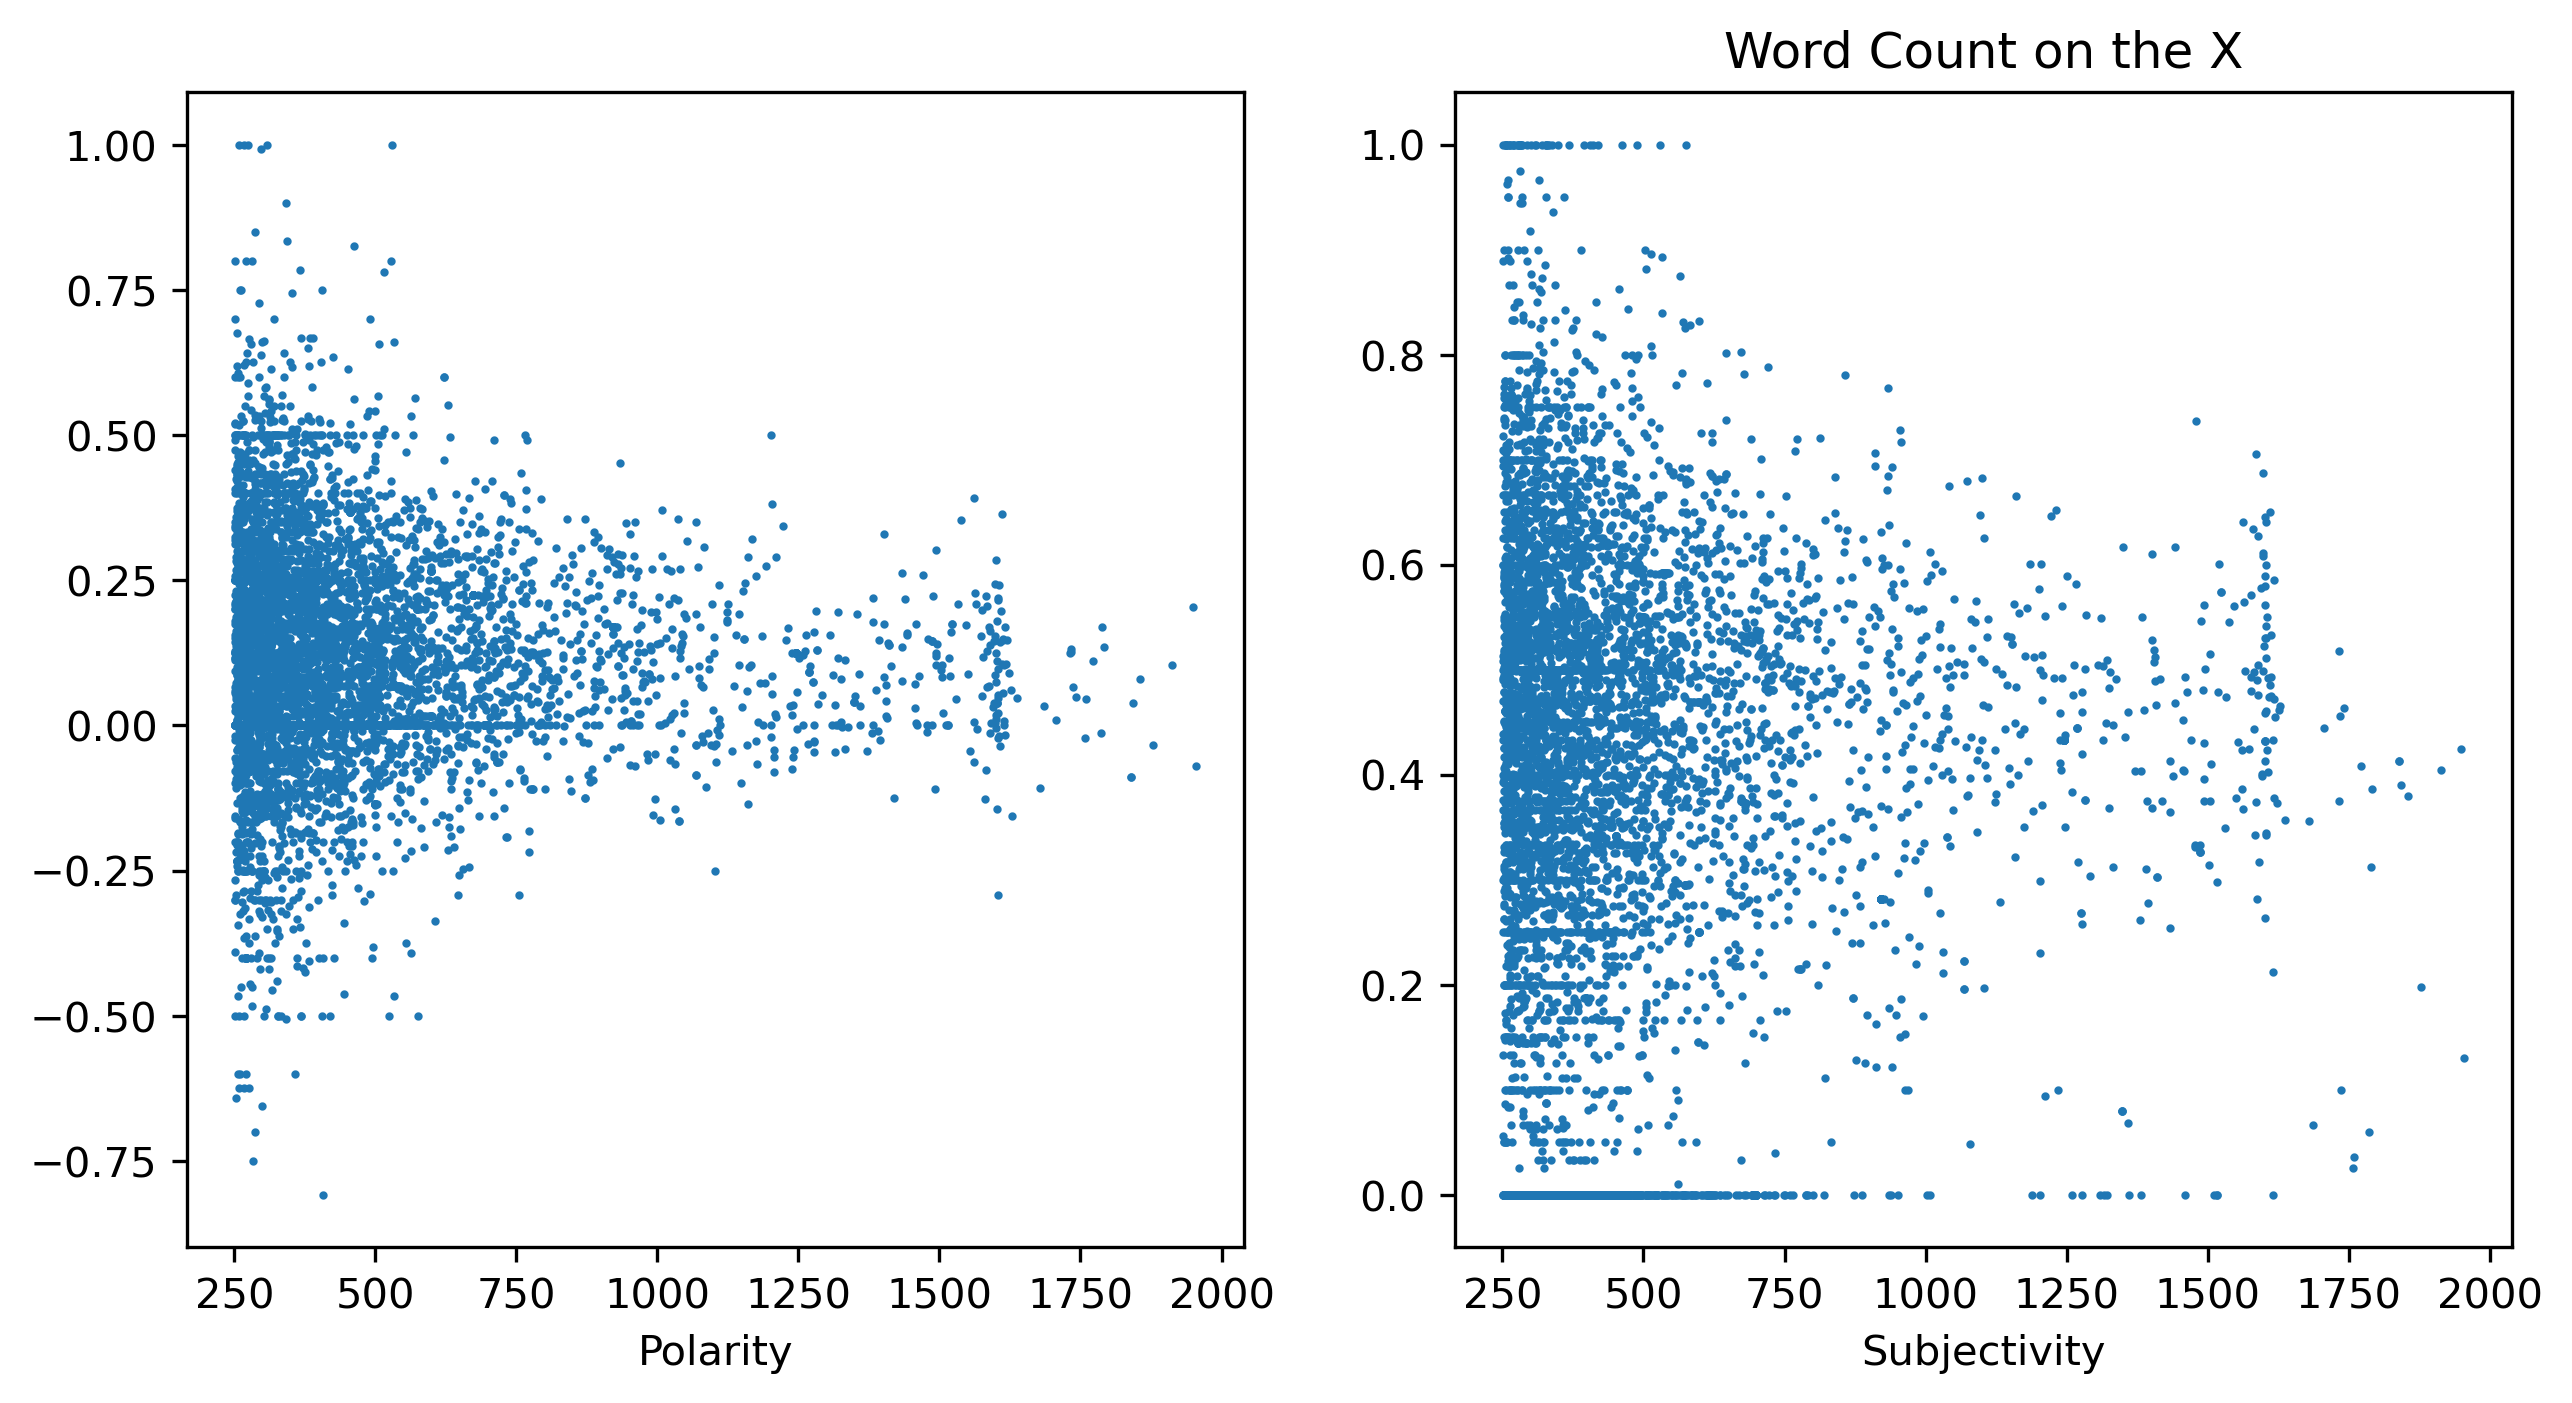

In [20]:
# 2D plots
plt.subplot(1, 2, 1)
plt.scatter(x_min, y_min, s=1)
plt.xlabel('Polarity')

plt.subplot(1, 2, 2)
plt.scatter(x_min, z_min, s=1)
plt.xlabel('Subjectivity')

plt.title('Word Count on the X')
plt.show()


Things rather even out. Perhaps there's another way to explore this...

## Emotional Verbs

What if we were to see what verbs most closely correspond to strong positive or negative sentiments? 

In [21]:
# Let's find us a blob to work with
blobs[500]

TextBlob(" dont believe me- what else would you call his 6.2 trillion dollar socialist bill he passed this past year? and he insisted on having his name on each of our checks  
")

In [22]:
# Let's see its tags and explore how to access them
blobs[500].tags

[('dont', 'JJ'),
 ('believe', 'VBP'),
 ('me-', 'NN'),
 ('what', 'WP'),
 ('else', 'RB'),
 ('would', 'MD'),
 ('you', 'PRP'),
 ('call', 'VB'),
 ('his', 'PRP$'),
 ('6.2', 'CD'),
 ('trillion', 'CD'),
 ('dollar', 'NN'),
 ('socialist', 'NN'),
 ('bill', 'NN'),
 ('he', 'PRP'),
 ('passed', 'VBD'),
 ('this', 'DT'),
 ('past', 'JJ'),
 ('year', 'NN'),
 ('and', 'CC'),
 ('he', 'PRP'),
 ('insisted', 'VBD'),
 ('on', 'IN'),
 ('having', 'VBG'),
 ('his', 'PRP$'),
 ('name', 'NN'),
 ('on', 'IN'),
 ('each', 'DT'),
 ('of', 'IN'),
 ('our', 'PRP$'),
 ('checks', 'NNS')]

In [23]:
# This is pretty much the same as the NLTK 
# (Neater this time)
for word, tag in blobs[500].tags:
    if tag == 'VB' or tag == 'VBD' or tag == 'VBP':
        print(word)

believe
call
passed
insisted


Okay, having worked through how to get the data we want, it's time to pull it together to begin to get some interesting results:

In [24]:
# Create a
positive_acts = []
for blob in blobs:
    if blob.sentiment.polarity >= 0.75:
        for word, tag in blob.tags:
            if tag == 'VB' or tag == 'VBD' or tag == 'VBP':
                positive_acts.append(word)

positive_set = set(positive_acts)
print(len(positive_acts))
print(len(positive_set))

3440
596


In [25]:
print(positive_set)

{'glad', 'lost', 'donate', 'Psalm', 'sure', '♥', 'blv', 'doin', 'dunno', '💗CJ💗🥰💞💎💝🎶🎵🎶💞🌟💞LOOK', 'better', '😆', 'envy', 'best', 'LoL', 'trust', 'figure', 'forget', 'CJ💗💎💝💞🙏💗🔥🔥🔥💞', 'tonight💗💎💝🌟💞for', 'Gab', 'work', 'pop', 'dear', '“', 'ask', 're', 'changed', 'approve', 'walmart', 'suppose', 'message', 'explained', 'buy', 'carried', 'grabs', 'included', 'look', 'reposted', 'love', 'enjoyed', 'support', 'assist', 'y', 'fear', 'WElcome', 'followed', 'build', 'mighta', 'Sonya', 'feels', 'finish', 'good', 'wear', 'made', 'Set', 'vjerovatno', 'come', 'enter', 'comrade', 'Keep', 'chanced', 'Continue', 'See', 'por', 'hops', 'continue', 'Helldoon', 'tried', 'Give', 'w/o', 'drain', 'existed', '<', 'pray', 'dropped', 'beautiful', 'Follow', 'got', 'call', 'bug', 'freedomland', 'trick', 'attend', 'bitch', 'booked', 'cause', 'Denied', 'dk', 'debate', 'Make', 'Welcome', 'encode', 'arrested', 'Abound', 'accept', 'remind', '👏', 'truffle', 'GAB', 'win', 'was', 'steal', 'subscribe', 'Just', 'resolve', 'prom

The next step might be to create tuples with each verb inheriting the polarity of the blob from which it was drawn and then averaging over the instances of that verb to map out which verbs have the higher, or lower, values.